
# Template — MVP: *Machine Learning & Analytics*
**Autor:** EDUARDO CAMARGO RIBEIRO BORGES

**Data:** 31/08/2025

**Matrícula:** 4052025000487

**Dataset:** [COVID-19 Dataset](https://www.kaggle.com/datasets/meirnizri/covid19-dataset)

> Obs: Estou dando continuidade no projeto desenvolvido na Sprint anterior de Análise de dados. Sendo assim, algumas análises já realizadas anteriormente serão repetidas aqui para centralização da informação.

---



## 1. Escopo, objetivo e definição do problema

### Contexto do problema
O conjunto de dados COVID-19 é um conjunto de dados multivariado que consiste em informações clínicas, demográficas e institucionais de pacientes testados para COVID-19. As variáveis incluem idade, sexo, presença de comorbidades (como diabetes, hipertensão e obesidade), tipo de atendimento recebido, além de indicadores como intubação, internação em UTI e desfecho clínico. O objetivo principal é classificar a possível morte de um paciente ou não, com base em suas características pessoais e condições de saúde, permitindo identificar perfis que demandam maior atenção médica.

### Tipo de Problema

Trata-se de um problema de classificação supervisionada. A partir de um conjunto de informações sobre os pacientes — como idade, sexo, comorbidades, tipo de atendimento e indicadores clínicos — o objetivo é prever a possível morte do paciente por complicações causadas pela COVID-19.

### Seleção de Dados

O dataset de COVID-19 utilizado neste projeto é composto por dados brutos provenientes de registros clínicos e institucionais, o que torna necessária uma etapa prévia de seleção e tratamento dos dados. Lidar com registros incompletos ou inconsistentes e, principalmente, definir com clareza os critérios que determinam se um paciente morrera ou não. Essa preparação é essencial para garantir que as análises e os modelos preditivos sejam construídos sobre uma base de dados confiável e representativa.

### Atributos do Dataset de COVID-19

O dataset de COVID-19 contém 1,048,576 de registros de pacientes testados para a doença, com informações clínicas, demográficas e institucionais. Abaixo estão os 21 atributos presentes:

- **sex**: sexo do paciente (1 para feminino, 2 para masculino)
- **age**: idade do paciente
- **classification**: resultado do teste para COVID-19 (valores de 1 a 3 indicam diagnóstico positivo, 4 indica que o paciente não foi diagnosticado com covid ou o teste foi inconclusivo)
- **patient type**: tipo de atendimento recebido (1 para retorno casa, 2 para hospitalização)
- **pneumonia**: presença de pneumonia no momento do diagnóstico (1 para sim, 2 para não)
- **pregnancy**: se o paciente está grávido (1 para sim, 2 para não)
- **diabetes**: presença de diabetes
- **copd**: presença de doença pulmonar obstrutiva crônica
- **asthma**: presença de asma
- **inmsupr**: condição de imunossupressão
- **hypertension**: presença de hipertensão
- **cardiovascular**: presença de doença cardiovascular
- **renal chronic**: presença de doença renal crônica
- **other disease**: presença de outras doenças
- **obesity**: presença de obesidade
- **tobacco**: uso de tabaco
- **usmr**: nível da unidade médica que atendeu o paciente (níveis 1,2,3)
- **medical unit**: tipo de instituição de saúde que realizou o atendimento
- **intubed**: se o paciente foi intubado (1 para sim, 2 para não)
- **icu**: se o paciente foi internado em UTI (1 para sim, 2 para não)
- **date died**: data do óbito do paciente (ou "9999-99-99" caso tenha sobrevivido)


## 2. Reprodutibilidade e ambiente

### 2.1 Biblotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.utils import resample

In [2]:
#Algoritmos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

### 2.2 Realizando o download do CSV.

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meirnizri/covid19-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.66M/4.66M [00:00<00:00, 42.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/meirnizri/covid19-dataset/versions/1


Nesse dataset é necessário fazer um tratamento simples para facilitar as análises.

In [4]:
# guardo o dataset em um dataframe
df = pd.read_csv(path+'/Covid Data.csv')
df.columns = df.columns.str.lower()

# primeiras linhas dataframe 1
df.head()

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## 3. Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset COVID-19, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

Para facilitar a correção e tornar as informações mais objetivas, este notebook apresenta apenas as análises principais; as demais podem ser consultadas no MVP anterior.

### 3.1 Total e Tipo das Instâncias

O dataset contém 1.048.575 instâncias (observações) e 21 atributos. Entre eles, 20 são do tipo numérico inteiro (int), porém, ao analisar o conteúdo, percebe-se que 19 desses atributos representam variáveis categóricas codificadas numericamente — como sexo, presença de comorbidades e tipo de atendimento médico. Apenas a variável age (idade) é verdadeiramente numérica e contínua. Já o atributo date_died é do tipo object, representando a data de óbito do paciente, quando aplicável.

In [5]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 1048575

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   intubed               1048575 non-null  int64 
 6   pneumonia             1048575 non-null  int64 
 7   age                   1048575 non-null  int64 
 8   pregnant              1048575 non-null  int64 
 9   diabetes              1048575 non-null  int64 
 10  copd                  1048575 non-null  int64 
 11  asthma                1048575 non-null  int64 
 12  inmsupr               1048575 non-null  int64 
 13  hipertension          1048575 non-null  int64

Embora, à primeira vista, o dataset não apresente valores nulos explícitos, a documentação revela que os valores '9999-99-99', 97, 98 e 99 são utilizados como códigos para representar dados ausentes ou não informados. Portanto, é fundamental realizar o tratamento desses valores logo no início do processo de análise, substituindo-os por null (ou NaN), a fim de garantir uma interpretação mais precisa e confiável dos dados na etapa de exploração.

#### Definição de valores nulos.
Para a definição, é assumindo que não deve ser aplicado em idade (age) pois podem existir pessoas com 97, 98 e 99 anos.

In [6]:
# Seleciona todas as colunas exceto 'age'
columns_to_treat = df.columns[df.columns != 'age']

# Substitui os valores nas colunas selecionadas
df[columns_to_treat] = df[columns_to_treat].replace(['9999-99-99', 97, 98, 99], np.nan)

In [7]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 1048575

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   usmer                 1048575 non-null  int64  
 1   medical_unit          1048575 non-null  int64  
 2   sex                   1048575 non-null  int64  
 3   patient_type          1048575 non-null  int64  
 4   date_died             76942 non-null    object 
 5   intubed               192706 non-null   float64
 6   pneumonia             1032572 non-null  float64
 7   age                   1048575 non-null  int64  
 8   pregnant              521310 non-null   float64
 9   diabetes              1045237 non-null  float64
 10  copd                  1045572 non-null  float64
 11  asthma                1045596 non-null  float64
 12  inmsupr               1045171 non-null  float64
 13  hipertension          1045471 

### 3.2 Estatísticas Descritivas

As estatísticas descritivas fornecem um resumo das principais características numéricas de um conjunto de dados, como média, desvio padrão, valores mínimo e máximo, além dos quartis.

No caso deste dataset, apenas o atributo age (idade) representa uma variável contínua adequada para esse tipo de análise. Os demais campos, embora armazenados como inteiros, representam variáveis categóricas codificadas numericamente sendo na maioria booleanas, e portanto, a interpretação estatística direta (como média ou desvio padrão) não é apropriada.

Essa observação pode ser confirmada ao analisar a saída do comando describe() a seguir.

In [8]:
# estatísticas descritivas básicas do dataset
df.describe().round(2)

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
count,1048575.00,1048575.00,1048575.0,1048575.00,192706.00,1032572.00,1048575.00,521310.00,1045237.00,1045572.00,1045596.00,1045171.00,1045471.00,1043530.00,1045499.00,1045543.00,1045569.00,1045355.00,1048575.00,192543.00
mean,1.63,8.98,1.5,1.19,1.83,1.86,41.79,1.98,1.88,1.99,1.97,1.99,1.84,1.97,1.98,1.85,1.98,1.92,5.31,1.91
std,0.48,3.72,0.5,0.39,0.38,0.34,16.91,0.12,0.32,0.12,0.17,0.12,0.36,0.16,0.14,0.36,0.13,0.27,1.88,0.28
min,1.00,1.00,1.0,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,1.00,4.00,1.0,1.00,2.00,2.00,30.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00
50%,2.00,12.00,1.0,1.00,2.00,2.00,40.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,6.00,2.00
75%,2.00,12.00,2.0,1.00,2.00,2.00,53.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,2.00
max,2.00,13.00,2.0,2.00,2.00,2.00,121.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,2.00


#### Dados Númericos

##### age
Idade dos pacientes

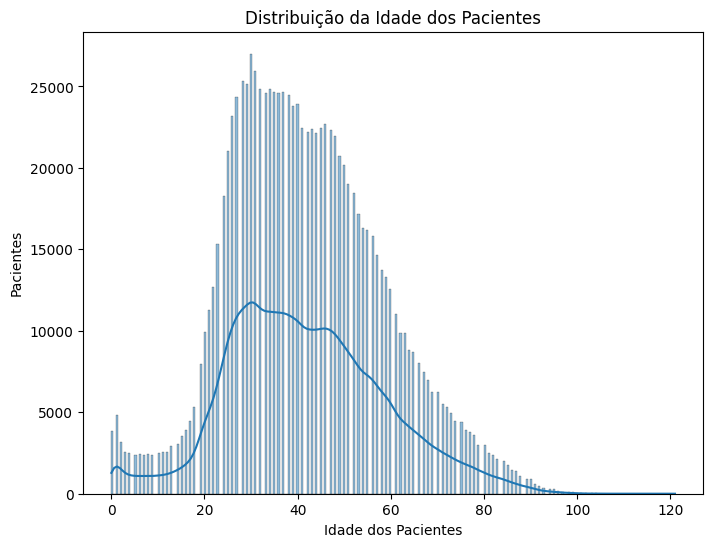

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribuição da Idade dos Pacientes')
plt.xlabel('Idade dos Pacientes')
plt.ylabel('Pacientes')
plt.show()

O histograma da idade dos pacientes revela uma distribuição assimétrica à direita, com a maior concentração de casos entre 25 e 35 anos. A média de idade gira em torno de 41 anos, e observa-se uma queda gradual na frequência conforme a idade avança, indicando que há menos pacientes idosos no conjunto de dados. A presença de pacientes com menos de 10 anos é pequena, mas ainda perceptível. A distribuição mostra que a maioria dos pacientes são adultos jovens e de meia-idade, o que pode estar relacionado à maior exposição ou acesso ao sistema de saúde por esse grupo.

#### Dados Categoricos

##### medical_unit
unidade médica que tratou o paciente

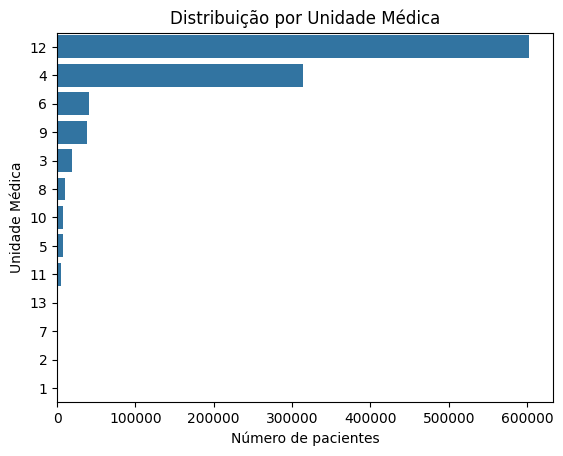

In [10]:
# Contagem por unidade médica
order = df['medical_unit'].value_counts().index

sns.countplot(y='medical_unit', order=order, data=df)
plt.title('Distribuição por Unidade Médica')
plt.xlabel('Número de pacientes')
plt.ylabel('Unidade Médica')
plt.show()

Foi escolhido deixar o gráfico de forma horizontal ordenado de forma decressente para gerar um ranking das instituições que mais atenderam pacientes.
Dessa maneira foi identificado que as instituições 12 e 4 são as 2 príncipais  nesse quesito com ~600.000 e ~300.000 pacientes atendidos respectivamente, a partir da terceira instituição os pacientes não chegam a 50.000.

##### sex
Indica o sexo do paciente (1 feminino, 2 masculino)

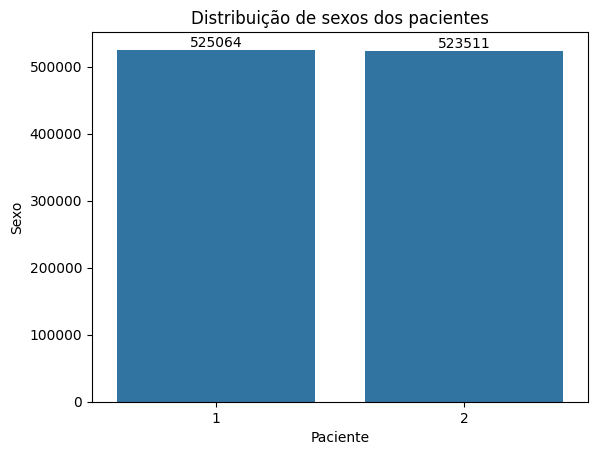

In [11]:
# Contagem por sexo
ax = sns.countplot(x='sex', data=df)
plt.title('Distribuição de sexos dos pacientes')
plt.xlabel('Paciente')
plt.ylabel('Sexo')

# Adiciona os valores no topo das colunas para análise preicsa
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 5,
        f'{int(height)}',
        ha='center', va='bottom'
    )

plt.show()

Ao analisar a distribuição do sexo dos pacientes por meio de um gráfico de barras, indica que provavelmente o autor dos dados tentou deixa-los balanceados por sexo. Inicialmente eles parecem estar relativamente balanceados. No entanto, ao observar os valores absolutos, percebe-se que há uma maior quantidade de pacientes do sexo feminino (1.553 a mais) em comparação ao masculino. Essa diferença pode impactar algumas análises ou modelos preditivos, sendo recomendável considerar técnicas de balanceamento, caso o desequilíbrio influencie os resultados.

##### patient_type
tipo de atendimento que o paciente recebeu na unidade. 1 para retorno ao domicílio e 2 para internação.

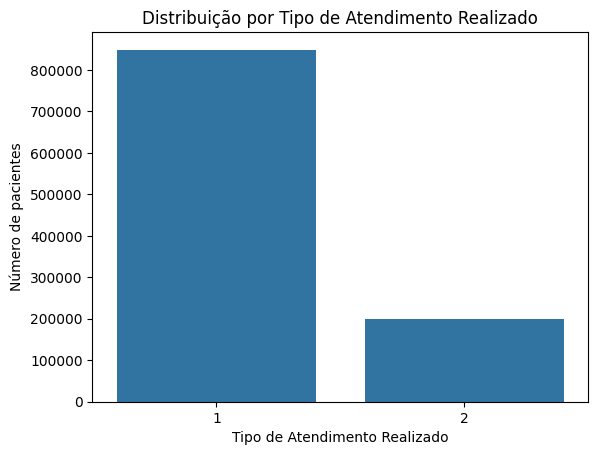

In [12]:
# Contagem por Tipo de Atendimento Realizado
sns.countplot(x='patient_type', data=df)
plt.title('Distribuição por Tipo de Atendimento Realizado')
plt.xlabel('Tipo de Atendimento Realizado')
plt.ylabel('Número de pacientes')
plt.show()

O gráfico mostra que a maior parte dos pacientes foram enviados para casa. É interessante avaliar se essa ação impactou no risco de morte do paciente.

##### intubed
Identifica se no tratamento o paciente foi intubado ou não

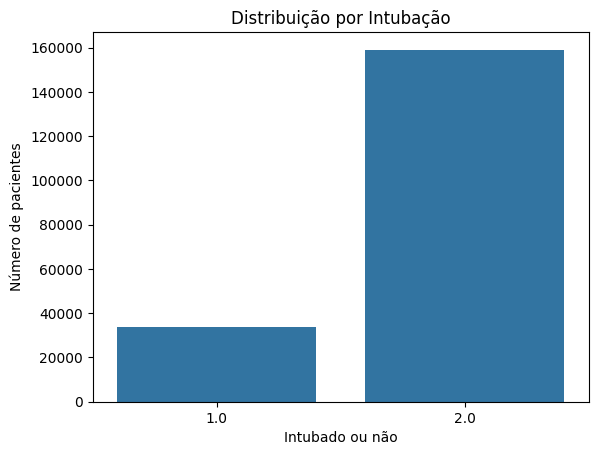

In [13]:
# Contagem por Intubação
sns.countplot(x='intubed', data=df)
plt.title('Distribuição por Intubação')
plt.xlabel('Intubado ou não')
plt.ylabel('Número de pacientes')
plt.show()

O gráfico de barras mostra claramente que a maioria dos pacientes não foi intubada, representando aproximadamente 160.000 registros, enquanto cerca de 35.000 pacientes foram intubados. É perceptivel que o gráfico só vai até a faixa de 160.000, ou seja, o restante dos pacientes se enquadram nos valores nulos definidos anteriormente

##### pregnant
Identifica se o paciente estava gravido ou não.

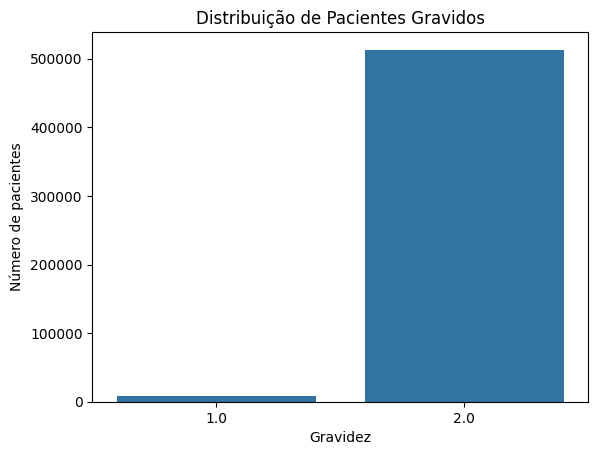

In [14]:
# Contagem por Pacientes Gravidos
sns.countplot(x='pregnant', data=df)
plt.title('Distribuição de Pacientes Gravidos')
plt.xlabel('Gravidez')
plt.ylabel('Número de pacientes')
plt.show()

A maior parte dos pacientes não estava gravido no momento do registro, como apenas mulheres podem ficar gravidas é interessante incluir um filtro de mulheres para verificar se afeta muito o gráfico

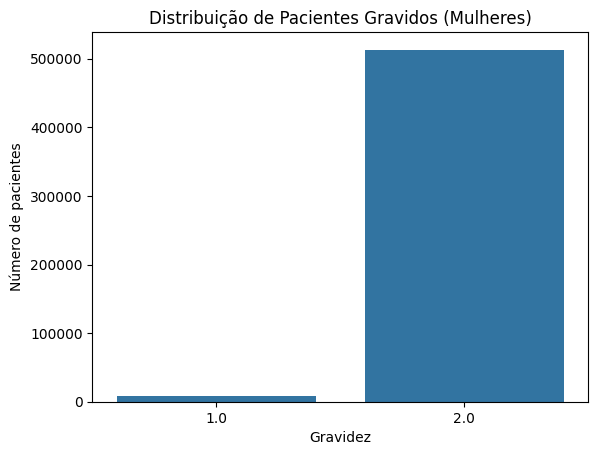

In [15]:
# Contagem por Pacientes Gravidos - Apenas mulheres

# Filtrando apenas mulheres
df_mulheres = df[df['sex'] == 1]

sns.countplot(x='pregnant', data=df_mulheres)
plt.title('Distribuição de Pacientes Gravidos (Mulheres)')
plt.xlabel('Gravidez')
plt.ylabel('Número de pacientes')
plt.show()

Como o gráfico manteve a mesma quantidade de registros mesmo após a filtragem por mulheres, pode-se interpretar que os valores considerados nulos no campo pregnant correspondem a pacientes do sexo masculino, para os quais essa informação não se aplica.

##### diabetes
Identifica se o paciente tem diabetes ou não

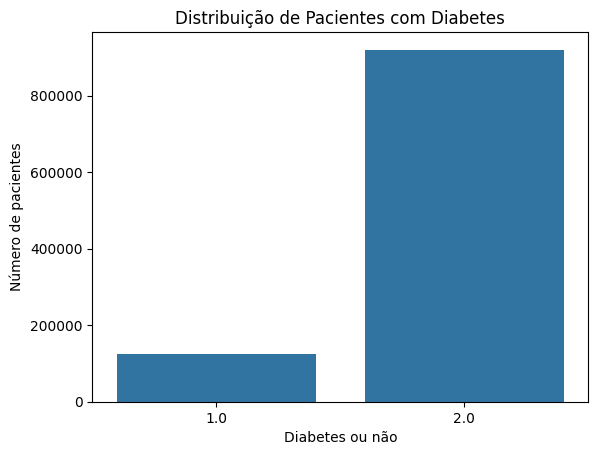

In [16]:
# Contagem por Diabetes
sns.countplot(x='diabetes', data=df)
plt.title('Distribuição de Pacientes com Diabetes')
plt.xlabel('Diabetes ou não')
plt.ylabel('Número de pacientes')
plt.show()

Mantendo o padrão dos gráficos anteriores, a comorbidade de diabetes afeta a minoria dos pacientes. Posteriormente é interessante verificar o grau de correlação de cada comorbidade com a morte ou não do paciente.

##### hipertension
Identifica se o paciente tem hipertensão

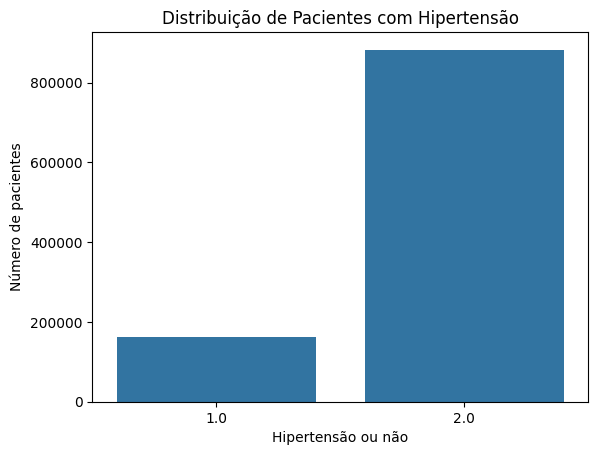

In [17]:
# Contagem por Hipertensão
sns.countplot(x='hipertension', data=df)
plt.title('Distribuição de Pacientes com Hipertensão')
plt.xlabel('Hipertensão ou não')
plt.ylabel('Número de pacientes')
plt.show()

##### other_disease
Identifica se o paciente tem alguma outra doença

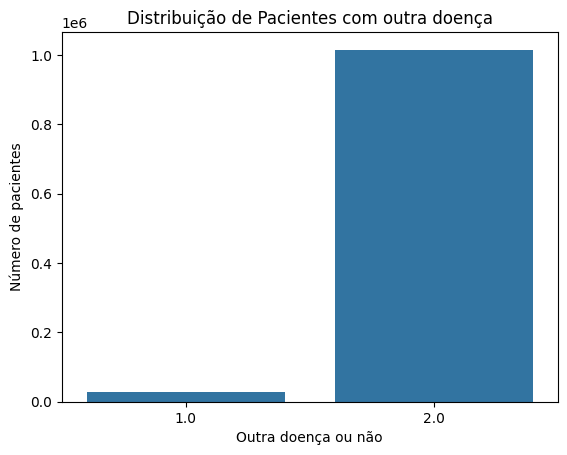

In [18]:
# Contagem por outra doença
sns.countplot(x='other_disease', data=df)
plt.title('Distribuição de Pacientes com outra doença')
plt.xlabel('Outra doença ou não')
plt.ylabel('Número de pacientes')
plt.show()

O campo "outra doença" apresenta uma complexidade maior de interpretação, pois não se refere a uma condição clínica específica, mas sim a qualquer outra comorbidade não listada individualmente no dataset. Isso torna difícil avaliar com precisão o grau de influência ou correlação com desfechos como óbito ou internação, uma vez que o conteúdo dessa variável pode variar bastante entre os pacientes. Além disso, a falta de padronização ou detalhamento do tipo de doença envolvida limita a capacidade de extrair conclusões mais assertivas a partir dessa informação.

##### obesity
Identifica se o paciente é obeso ou não

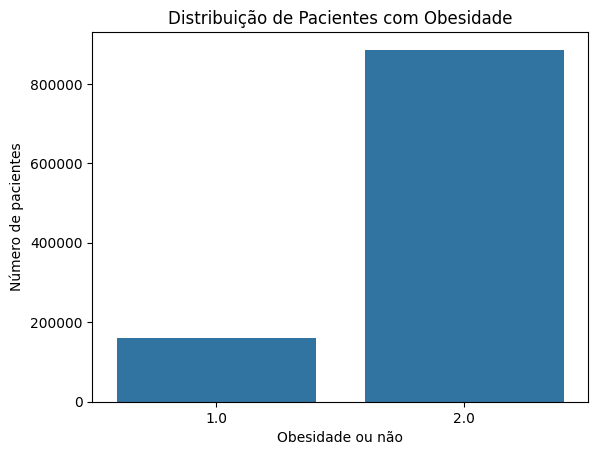

In [19]:
# Contagem por Obesidade
sns.countplot(x='obesity', data=df)
plt.title('Distribuição de Pacientes com Obesidade')
plt.xlabel('Obesidade ou não')
plt.ylabel('Número de pacientes')
plt.show()

##### tobacco
Identifica se o paciente é tabagista ou não

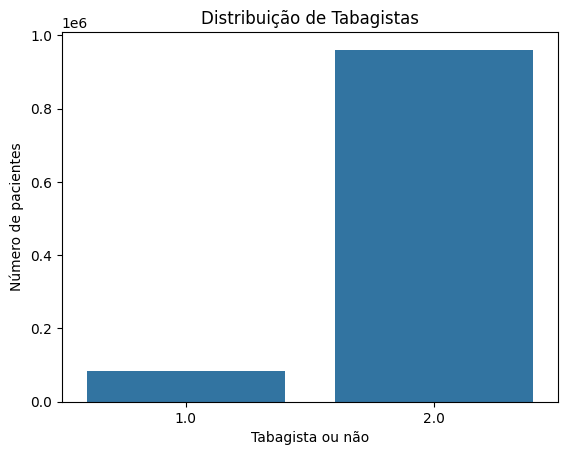

In [20]:
# Contagem por tabagistas
sns.countplot(x='tobacco', data=df)
plt.title('Distribuição de Tabagistas')
plt.xlabel('Tabagista ou não')
plt.ylabel('Número de pacientes')
plt.show()

##### classifaction_final
Representa a classificação do paciente, (possui covid, não possui covid/inconclusivo)

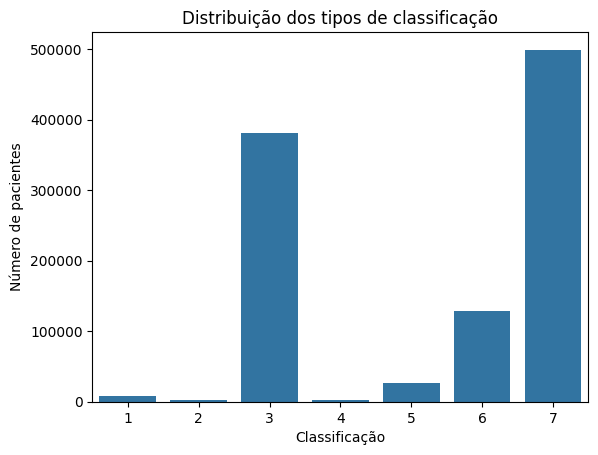

In [21]:
# Contagem por tipo de classificação
sns.countplot(x='clasiffication_final', data=df)
plt.title('Distribuição dos tipos de classificação')
plt.xlabel('Classificação')
plt.ylabel('Número de pacientes')
plt.show()

Analisando o gráfico, é possível identificar que a maior parte dos pacientes foram classificados como sem covid ou resultado inconclusivo (4-7) aproximadamente 700.000 pacientes, o restante dos pacientes foram classificados com covid em diferentes graus (1-3).

##### icu
Identifica se o paciente foi internado na UTI

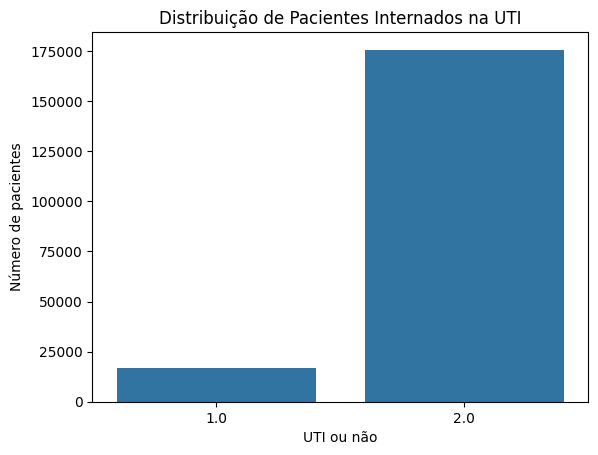

In [22]:
# Contagem por UTI
sns.countplot(x='icu', data=df)
plt.title('Distribuição de Pacientes Internados na UTI')
plt.xlabel('UTI ou não')
plt.ylabel('Número de pacientes')
plt.show()

## 4. Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

### 4.1 Criação e ajustes de Classes

O primeiro passo é criar uma nova variavel para guardar a informação de se o paciente morreu ou não.

In [23]:
# Criação da coluna 'died' como classe binária, caso exista data de morte o valor é 1 (died), caso não exista 0 (survived)
df['died'] = df['date_died'].notna().astype(bool)

# Removendo a coluna date_died após o uso na criação do rotulo
df.drop(columns=["date_died"], inplace=True)

Após a criação da variável que indica se o paciente foi a óbito ou não, torna-se possível realizar análises mais aprofundadas com base nesse desfecho. Essa nova informação permite investigar relações com outras variáveis do conjunto de dados, como comorbidades, faixa etária, sexo e tipo de atendimento, enriquecendo a análise exploratória e possibilitando a construção de modelos preditivos.

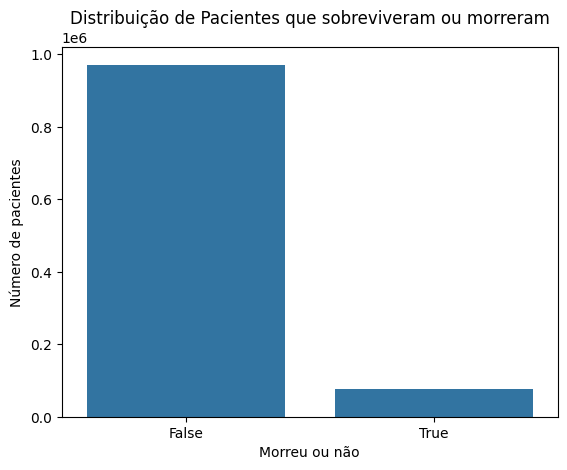

In [24]:
# Contagem por Mortos ou nao
sns.countplot(x='died', data=df)
plt.title('Distribuição de Pacientes que sobreviveram ou morreram')
plt.xlabel('Morreu ou não')
plt.ylabel('Número de pacientes')
plt.show()

O gráfico revela um forte desbalanceamento entre pacientes que sobreviveram e os que foram a óbito, com a maioria absoluta tendo sobrevivido. Esse padrão, embora esperado em contextos populacionais amplos, exige atenção na análise e principalmente na modelagem preditiva, pois algoritmos podem favorecer a classe majoritária. Assim, é fundamental aplicar técnicas de balanceamento de classes e avaliar métricas além da acurácia para garantir que o modelo identifique corretamente a morte ou não do paciente.

### 4.2 Análises aprofundadas com a classe 'died'

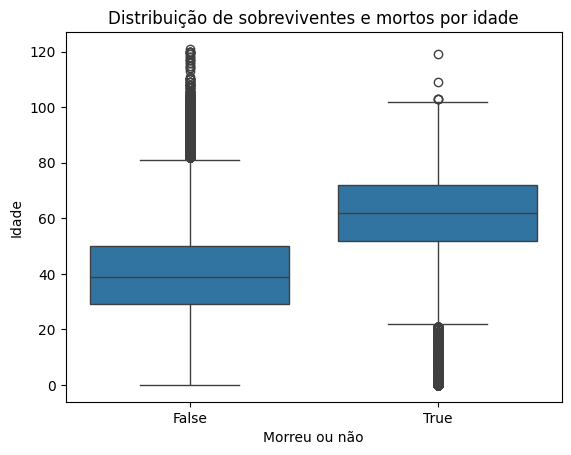

In [25]:
# Distribuição de sobreviventes e mortos por idade
sns.boxplot(x='died', y='age', data=df)
plt.title('Distribuição de sobreviventes e mortos por idade')
plt.xlabel('Morreu ou não')
plt.ylabel('Idade')
plt.show()

O gráfico de boxplot é especialmente útil neste caso, pois evidencia de forma clara a relação entre idade e mortalidade. Observa-se que os pacientes que sobreviveram estão majoritariamente concentrados entre 30 e 50 anos, enquanto entre os que foram a óbito, a concentração se dá entre 50 e 75 anos. Além disso, a mediana de idade dos que morreram é consideravelmente mais alta, sugerindo uma forte associação entre o avanço da idade e o risco de morte por COVID-19. Ainda assim, é importante destacar a presença de outliers em ambas as categorias, reforçando que a idade, embora relevante, não é o único fator determinante.

#### Avaliando comorbidades

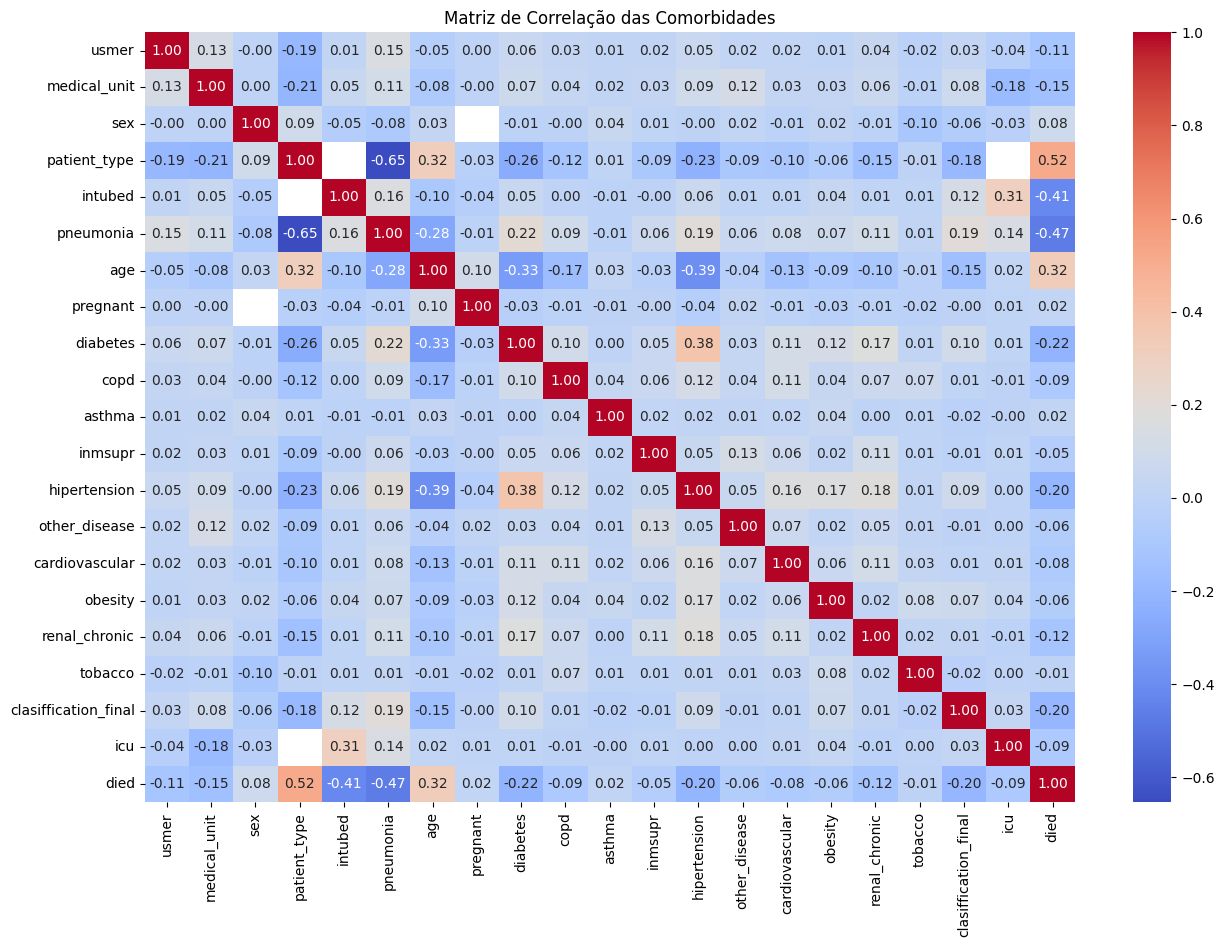

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Comorbidades')
plt.show()

A análise da matriz de correlação revelou que algumas variáveis clínicas possuem relação relevante com o desfecho de óbito. As variáveis pneumonia e intubação apresentaram as maiores correlações negativas com a variável *died*, indicando que pacientes com essas condições têm maior probabilidade de morte. Outras comorbidades como diabetes, hipertensão e doença renal crônica também mostraram correlações negativas, embora mais fracas. Esse padrão se justifica pelo fato de os dados estarem codificados como 1 para presença da condição e 2 para ausência, o que inverte o sinal da correlação. Observou-se ainda que a maioria das comorbidades apresenta baixa correlação entre si, reduzindo preocupações com multicolinearidade em análises futuras. Dessa forma, a matriz de correlação contribui para destacar quais fatores clínicos podem estar mais associados ao risco de morte e serve como base para aprofundar a investigação com métodos estatísticos e preditivos mais robustos.

In [27]:
# Criação do campo age_group (faixa etária) para facilitar análises relacionadas a idades.
bins = [0, 18, 30, 50, 65, 80, 120]
labels = ['0-18', '19-30', '31-50', '51-65', '66-80', '80+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

Mostrando a eficiência de análise por faixa etária:

/tmp/ipython-input-2354102539.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcao_obitos = df.groupby('age_group')['died'].mean().reset_index()
/tmp/ipython-input-2354102539.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=proporcao_obitos, x='age_group', y='died', palette='Reds')


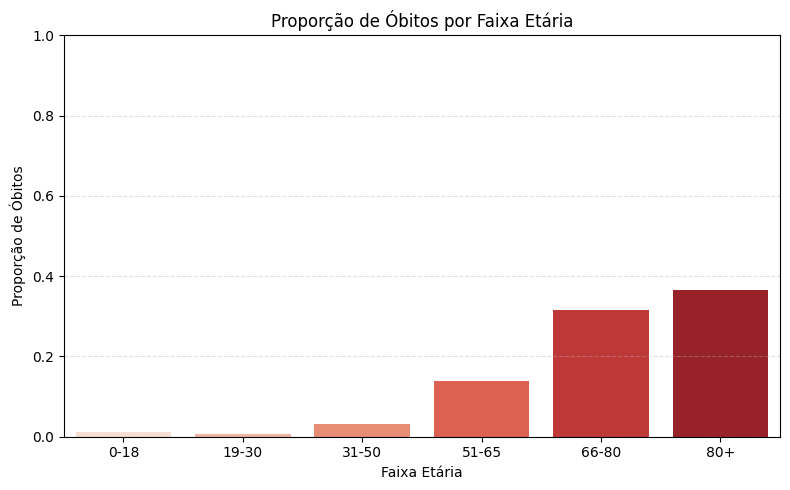

In [28]:
# Agrupa e calcula proporção de óbitos por faixa etária
proporcao_obitos = df.groupby('age_group')['died'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=proporcao_obitos, x='age_group', y='died', palette='Reds')

plt.title('Proporção de Óbitos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Proporção de Óbitos')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

O gráfico de proporção de óbitos por faixa etária é bastante informativo e revela de forma clara que o risco de morte por COVID-19 aumenta significativamente com a idade. A segmentação das faixas etárias está bem definida e permite observar que a partir dos 51 anos, especialmente acima dos 66, a proporção de óbitos se eleva de maneira acentuada. Utilizar a proporção como métrica foi uma escolha adequada, pois evita distorções causadas por diferentes tamanhos de grupos. A visualização é clara, reforçada pelo uso de cores que indicam gravidade. Para aprimorar ainda mais, seria interessante incluir os valores numéricos sobre as barras e, se possível, complementar com a quantidade total de casos por faixa, para melhor contextualização. O gráfico, portanto, cumpre bem seu papel ao evidenciar a maior vulnerabilidade de pacientes idosos à doença.

### 4.3 Altearndo classes binarias (1-2) para (0-1) e conversão para bool

Essa transformação é importante porque, em sua forma original (1 = sim, 2 = não), os algoritmos de machine learning podem interpretar os valores como hierárquicos ou ordinais, o que não reflete a realidade dessas variáveis. Ao reconfigurar para o padrão binário (0 = falso, 1 = verdadeiro), garantimos que os modelos tratem essas variáveis de forma puramente categórica, evitando distorções na análise e melhorando a interpretação dos resultados.



In [29]:
# Lista das colunas binárias codificadas como 1/2
binarias_12 = [
    'intubed', 'pneumonia', 'pregnant', 'diabetes',
    'copd', 'asthma', 'inmsupr', 'hipertension', 'other_disease',
    'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'icu'
]

# Substitui 2 por 0 nessas colunas
df[binarias_12] = df[binarias_12].replace({2: 0})

In [30]:
for col in binarias_12:
    print(f"{col}: {df[col].unique()}")

intubed: [nan  1.  0.]
pneumonia: [ 1.  0. nan]
pregnant: [ 0. nan  1.]
diabetes: [ 0.  1. nan]
copd: [ 0.  1. nan]
asthma: [ 0.  1. nan]
inmsupr: [ 0.  1. nan]
hipertension: [ 1.  0. nan]
other_disease: [ 0.  1. nan]
cardiovascular: [ 0.  1. nan]
obesity: [ 0.  1. nan]
renal_chronic: [ 0.  1. nan]
tobacco: [ 0.  1. nan]
icu: [nan  0.  1.]


In [31]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 1048575

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   usmer                 1048575 non-null  int64   
 1   medical_unit          1048575 non-null  int64   
 2   sex                   1048575 non-null  int64   
 3   patient_type          1048575 non-null  int64   
 4   intubed               192706 non-null   float64 
 5   pneumonia             1032572 non-null  float64 
 6   age                   1048575 non-null  int64   
 7   pregnant              521310 non-null   float64 
 8   diabetes              1045237 non-null  float64 
 9   copd                  1045572 non-null  float64 
 10  asthma                1045596 non-null  float64 
 11  inmsupr               1045171 non-null  float64 
 12  hipertension          1045471 non-null  float64 
 13  other_disease  

In [32]:
# Converte para tipo booleano
df[binarias_12] = df[binarias_12].astype('boolean')

In [33]:
for col in binarias_12:
    print(f"{col}: {df[col].unique()}")

intubed: <BooleanArray>
[<NA>, True, False]
Length: 3, dtype: boolean
pneumonia: <BooleanArray>
[True, False, <NA>]
Length: 3, dtype: boolean
pregnant: <BooleanArray>
[False, <NA>, True]
Length: 3, dtype: boolean
diabetes: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
copd: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
asthma: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
inmsupr: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
hipertension: <BooleanArray>
[True, False, <NA>]
Length: 3, dtype: boolean
other_disease: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
cardiovascular: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
obesity: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
renal_chronic: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
tobacco: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
icu: <BooleanArray>
[<NA>, False, True]
Length: 3, dtype: boolean


In [34]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 1048575

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   usmer                 1048575 non-null  int64   
 1   medical_unit          1048575 non-null  int64   
 2   sex                   1048575 non-null  int64   
 3   patient_type          1048575 non-null  int64   
 4   intubed               192706 non-null   boolean 
 5   pneumonia             1032572 non-null  boolean 
 6   age                   1048575 non-null  int64   
 7   pregnant              521310 non-null   boolean 
 8   diabetes              1045237 non-null  boolean 
 9   copd                  1045572 non-null  boolean 
 10  asthma                1045596 non-null  boolean 
 11  inmsupr               1045171 non-null  boolean 
 12  hipertension          1045471 non-null  boolean 
 13  other_disease  

### 4.4 Tratamento de Valores Nulos

O dataset COVID-19 original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [35]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset COVID:")
df.isnull().sum()

Valores nulos no dataset COVID:


,0
usmer,0
medical_unit,0
sex,0
patient_type,0
intubed,855869
pneumonia,16003
age,0
pregnant,527265
diabetes,3338
copd,3003


### 4.5 Preenchimento com a moda (0/false)
As variáveis de comorbidades no dataset são binárias e indicam a presença ou ausência de condições médicas, como diabetes, hipertensão, asma, entre outras. Quando há ausência de valor, faz sentido assumir que a condição não foi registrada porque o paciente não a possui.

Preencher os valores nulos com 0 (ou False) evita distorções nos modelos, mantém a integridade da análise e reduz perdas de informação, uma vez que valores nulos podem excluir registros durante o treinamento. Essa abordagem é coerente com a natureza dos dados clínicos e com boas práticas de pré-processamento.

In [36]:
comorbidades = [
    'pneumonia', 'diabetes', 'copd', 'asthma', 'inmsupr',
    'hipertension', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'other_disease'
]
df[comorbidades] = df[comorbidades].fillna(False)

In [37]:
df['intubed'] = df['intubed'].fillna(False)
df['icu'] = df['icu'].fillna(False)

Como homens biologicamente não podem engravidar, os registros do sexo masculino foram atribuídos como 0 (ou False) no campo *pregnant*. Para os registros do sexo feminino, os valores nulos também foram considerados como ausência de gravidez, sendo preenchidos igualmente com 0.

In [38]:
df.loc[df['sex'] == 2, 'pregnant'] = False
df['pregnant'] = df['pregnant'].fillna(False)

In [39]:
# Verificar a presença de valores nulos no dataset
print("Valores nulos no dataset COVID:")
df.isnull().sum()

Valores nulos no dataset COVID:


,0
usmer,0
medical_unit,0
sex,0
patient_type,0
intubed,0
pneumonia,0
age,0
pregnant,0
diabetes,0
copd,0


*age_group* é apenas utilizado para analise não sendo necessário tratar

In [40]:
df.drop(columns=["age_group"],inplace=True)

### 4.6 Feature Selection
Removendo colunas com baixa correlação com a coluna died com base em matriz de correlação

In [41]:
baixa_correlacao = ["sex","pregnant","copd","asthma","inmsupr","other_disease","cardiovascular",
                      "obesity","tobacco","icu"]

df.drop(columns=baixa_correlacao,inplace=True)

### 4.7 One-hot encoding

Essa técnica se faz necessária em váriaveis categoricas mas que não existe uma hierarquia clara nos

Na base de dados já vem aplicada a técnica de label enconding que já atende a necessidade, por exemplo na coluna usmr que identifica o nivel da unidade médica em que o paciente foi atendido.
Sendo assim, a aplicação do One-hot enconding sera aplicada nas variaveis categoricas ('sex', 'medical_unit', 'classification', 'patient_type')

In [42]:
# Aplica One-Hot Encoding nas colunas categóricas
df = pd.get_dummies(
    df,
    columns=['medical_unit', 'clasiffication_final', 'patient_type'],
    prefix=['unit', 'class', 'ptype'],
    drop_first=False
)

In [43]:
df.columns[df.columns.str.startswith(('sex_', 'unit_', 'class_', 'ptype_'))]

Index(['unit_1', 'unit_2', 'unit_3', 'unit_4', 'unit_5', 'unit_6', 'unit_7',
       'unit_8', 'unit_9', 'unit_10', 'unit_11', 'unit_12', 'unit_13',
       'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6',
       'class_7', 'ptype_1', 'ptype_2'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 30 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   usmer          1048575 non-null  int64  
 1   intubed        1048575 non-null  boolean
 2   pneumonia      1048575 non-null  boolean
 3   age            1048575 non-null  int64  
 4   diabetes       1048575 non-null  boolean
 5   hipertension   1048575 non-null  boolean
 6   renal_chronic  1048575 non-null  boolean
 7   died           1048575 non-null  bool   
 8   unit_1         1048575 non-null  bool   
 9   unit_2         1048575 non-null  bool   
 10  unit_3         1048575 non-null  bool   
 11  unit_4         1048575 non-null  bool   
 12  unit_5         1048575 non-null  bool   
 13  unit_6         1048575 non-null  bool   
 14  unit_7         1048575 non-null  bool   
 15  unit_8         1048575 non-null  bool   
 16  unit_9         1048575 non-null  bool   
 17  unit_10 

## 5. Separação de treino e teste / Validação Cruzada

In [45]:
# Define X (atributos) e y (target)
X = df.drop(columns=["died"])
y = df["died"]

# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=7
)

# Criação dos folds para validação cruzada
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)

## 6. Testando Modelos

### 6.1 Regressão logística

Realizando um teste inicial com regressão logistica para validar se é necessário mais algum tipo de tratamento antes de testar com diversos modelos.

Acurácia: 0.9492
F1-score: 0.5943


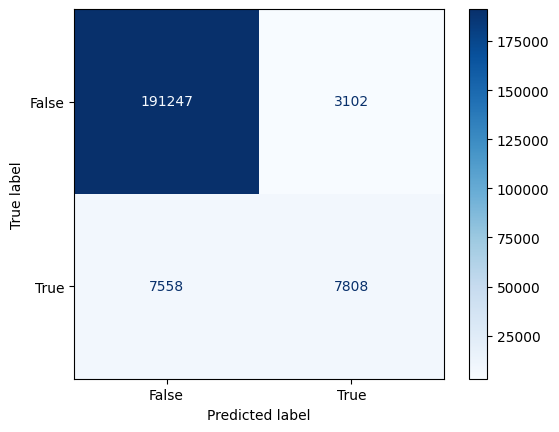

In [46]:
# Treina o modelo
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Faz previsões
y_pred = model.predict(X_test)

# Calcula acurácia
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acc:.4f}")

# Calcula F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.show()

Com essa análise inicial, observa-se que a acurácia do modelo foi alta. No entanto, ao avaliar o F1-score e a matriz de confusão, percebe-se uma tendência do modelo a classificar mais casos como negativo (198.805) do que positivo (10.910). Esse comportamento provavelmente se deve ao desbalanceamento do dataset, que contém muito mais registros negativos do que positivos.

In [47]:
# Contagem de cada classe no target
print(y.value_counts())
print(y.value_counts(normalize=True))  # porcentagem

died
False    971633
True      76942
Name: count, dtype: int64
died
False    0.926622
True     0.073378
Name: proportion, dtype: float64


### 6.2 Undersampling
De fato, ao analisar as quantidades e proporções dos registros das classes falso e verdadeiro, observa-se um desbalanceamento significativo, que precisa ser tratado.

Para isso, será aplicado undersampling, que não apenas corrigirá o desbalanceamento, mas também reduzirá a quantidade total de registros, contribuindo para um tempo de processamento mais rápido dos algoritmos.

In [48]:
# Separar as classes
df_major = df[df['died'] == 0]  # classe majoritária
df_minor = df[df['died'] == 1]  # classe minoritária

# Fazer undersampling da classe majoritária
df_major_downsampled = resample(
    df_major,
    replace=False,                # sem reposição
    n_samples=len(df_minor),      # igual ao tamanho da classe minoritária
    random_state=7
)

# Combinar as classes novamente
df_balanced = pd.concat([df_major_downsampled, df_minor])

# Opcional: embaralhar os registros
df_balanced = df_balanced.sample(frac=1, random_state=7).reset_index(drop=True)

# Separar X e y novamente
X = df_balanced.drop(columns=['died'])
y = df_balanced['died']

# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=7
)

# Contagem de cada classe no target
print(y.value_counts())
print(y.value_counts(normalize=True))  # porcentagem




died
True     76942
False    76942
Name: count, dtype: int64
died
True     0.5
False    0.5
Name: proportion, dtype: float64


Acurácia: 0.9067
F1-score: 0.9071


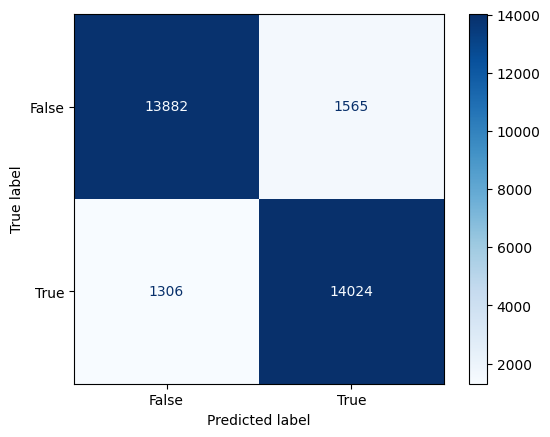

In [49]:
# Treina o modelo
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Faz previsões
y_pred = model.predict(X_test)

# Calcula acurácia
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acc:.4f}")

# Calcula F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.show()

Após a aplicação do undersampling, observou-se que o modelo apresentou desempenho melhor na classificação, sem mostrar preferência por nenhuma das classes. E com isso é possível testar com novos modelos.

### 6.3 Avaliando príncipais modelos
Não executar

In [ ]:
# # Seed global
# np.random.seed(7)

# # Listas para armazenar os modelos, os resultados e os nomes dos modelos
# models = []
# results = []
# names = []

# models.append(("LR", LogisticRegression(max_iter=1000)))  # Regressão Logística
# models.append(("KNN", KNeighborsClassifier()))            # KNN
# models.append(("CART", DecisionTreeClassifier()))         # Árvore de Decisão
# models.append(("NB", GaussianNB()))                       # Naive Bayes
# models.append(("RF", RandomForestClassifier()))           # Random Forest
# models.append(("GBM", GradientBoostingClassifier()))      # Gradient Boosting
# models.append(("ADA", AdaBoostClassifier()))              # AdaBoost

# # Avaliando cada modelo
# for name, model in models:
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

# # Boxplot comparativo
# fig = plt.figure(figsize=(10, 6))
# fig.suptitle("Comparação da Acurácia dos Modelos")
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

LR: 0.905765 (0.002981)
KNN: 0.903190 (0.002450)
CART: 0.891842 (0.001815)
NB: 0.868578 (0.002152)
RF: 0.900867 (0.001973)


KeyboardInterrupt: 

Após testar diversos modelos, observou-se que o GradientBoostingClassifier (GBM) apresentou a maior acurácia. No entanto, para confirmar se ele é realmente o mais adequado, será realizada uma análise mais aprofundada de seu desempenho.

Gradient Boosting - Accuracy CV: 0.914489 (+/- 0.001750)
Gradient Boosting - Accuracy Teste: 0.915586
Gradient Boosting - F1-score Teste: 0.917555


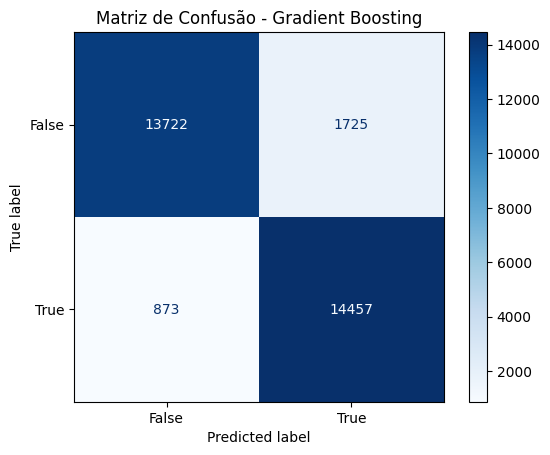

In [50]:
# Inicialização do modelo
gbm = GradientBoostingClassifier(random_state=7)

# Avaliação via cross-validation (acurácia)
cv_acc = cross_val_score(gbm, X_train, y_train, cv=kfold, scoring='accuracy')
print(f"Gradient Boosting - Accuracy CV: {cv_acc.mean():.6f} (+/- {cv_acc.std():.6f})")

# Treinar o modelo no treino completo
gbm.fit(X_train, y_train)

# Previsões no teste
y_pred = gbm.predict(X_test)

# Avaliar métricas no teste
acc_test = accuracy_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
print(f"Gradient Boosting - Accuracy Teste: {acc_test:.6f}")
print(f"Gradient Boosting - F1-score Teste: {f1_test:.6f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbm.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Gradient Boosting")
plt.show()

Com base nos resultados obtidos, o Gradient Boosting Classifier apresentou uma acurácia média na validação cruzada de 91,45% e 91,56% no conjunto de teste, enquanto o F1-score no teste foi de 91,76%. Esses indicadores, aliados à análise da matriz de confusão, sugerem que o modelo está classificando corretamente ambas as classes sem apresentar preferência por nenhuma delas.

Portanto, podemos concluir que o modelo apresenta desempenho consistente, boa acurácia e equilíbrio na classificação das classes, tornando-o confiável para este conjunto de dados.

### 6.4 Otimização dos hiperparâmetros

Para refinar ainda mais o desempenho do modelo, podemos testar diferentes combinações de hiperparâmetros e identificar aquelas que são mais adequadas para este dataset, com o objetivo de melhorar a acurácia e a capacidade de classificação obtidas nos testes iniciais.

In [ ]:
# # Inicialização do modelo
# gbm = GradientBoostingClassifier(random_state=7)

# # Definição do grid de hiperparâmetros
# param_grid = {
#     'n_estimators': [100, 200, 300],         # número de árvores
#     'learning_rate': [0.01, 0.05, 0.1],     # taxa de aprendizado
#     'max_depth': [3, 4, 5],                  # profundidade máxima de cada árvore
#     'subsample': [0.8, 1.0],                 # fração de amostras por árvore
#     'max_features': [None, 'sqrt', 'log2']   # número de features por split
# }

# # Configuração do GridSearchCV
# grid_search = GridSearchCV(
#     estimator=gbm,
#     param_grid=param_grid,
#     scoring='f1',        # otimiza para F1-score
#     cv=3,               # 3 folds
#     n_jobs=-1,           # usa todos os núcleos da CPU
#     verbose=1
# )

# # Executar o grid search
# grid_search.fit(X_train, y_train)

# # Melhor combinação de hiperparâmetros
# print("Melhores hiperparâmetros:", grid_search.best_params_)
# print("Melhor F1-score no CV:", grid_search.best_score_)

# # Avaliar no conjunto de teste
# best_gbm = grid_search.best_estimator_
# y_pred = best_gbm.predict(X_test)
# print(f"Acurácia no teste: {accuracy_score(y_test, y_pred):.4f}")
# print(f"F1-score no teste: {f1_score(y_test, y_pred):.4f}")
# print(classification_report(y_test, y_pred, target_names=["survived", "died"]))


Resultado:

Fitting 3 folds for each of 162 candidates, totalling 486 fits

Melhores hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 300, 'subsample': 1.0}

Melhor F1-score no CV: 0.9183397571270261

Acurácia no teste: 0.9165

F1-score no teste: 0.9186
              precision    recall  f1-score   support

    survived       0.94      0.89      0.91     15447
        died       0.89      0.95      0.92     15330

    accuracy                           0.92     30777
   macro avg       0.92      0.92      0.92     30777
weighted avg       0.92      0.92      0.92     30777


Após os testes de otimização de hiperparâmetros, foram identificadas as melhores combinações para o Gradient Boosting Classifier:
{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 300, 'subsample': 1.0}

Com esses parâmetros, o modelo apresentou um F1-score médio na validação cruzada de 91,83%, uma acurácia no conjunto de teste de 91,65% e F1-score de 91,86%. Além disso, o modelo demonstrou bom equilíbrio na classificação das classes, conforme evidenciado pelo classification report, com recall alto tanto para survived (89%) quanto para died (95%).

Portanto, esses hiperparâmetros serão utilizados para treinar o modelo final, garantindo desempenho consistente e confiável.

## 7. Finalização do Modelo

Após a etapa de otimização de hiperparâmetros, o Gradient Boosting Classifier foi configurado com a melhor combinação identificada, resultando em um modelo consistente e equilibrado na classificação das classes. Podendo ser salvo em pkl para ser utilizado posteriormente.
Nesta fase final, o modelo é:

Treinado com todo o conjunto de dados balanceado, garantindo que aproveite ao máximo as informações disponíveis.

Organizado em um pipeline, incluindo as etapas de pré-processamento necessárias, de forma a padronizar o fluxo de treino e predição.

Exportado em formato serializado .pkl, permitindo que seja facilmente carregado e aplicado em novos dados, seja em ambientes de teste, relatórios ou mesmo em sistemas de produção.

Esse procedimento garante reprodutibilidade, facilidade de manutenção e escalabilidade do modelo.

In [51]:
import joblib

# Separar X e y
X = df_balanced.drop(columns=["died"])
y = df_balanced["died"]

# Separar colunas numéricas e categóricas
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["category", "object", "bool"]).columns

# Pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# Definir modelo com melhores hiperparâmetros encontrados
gbm = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=4,
    max_features="sqrt",
    n_estimators=300,
    subsample=1.0,
    random_state=7
)

# Criar pipeline completo
pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", gbm)
])

# Treinar modelo com TODOS os dados balanceados
pipeline.fit(X, y)

# Salvar pipeline treinado em formato PKL
joblib.dump(pipeline, "gbm_final_model.pkl")

print("Modelo final treinado e salvo como 'gbm_final_model.pkl'")

Modelo final treinado e salvo como 'gbm_final_model.pkl'


# 8. Testando o modelo final .pkl

In [52]:
# Carregar o pipeline salvo
pipeline = joblib.load("gbm_final_model.pkl")

# Exemplo de novos dados (pode ser DataFrame ou apenas uma linha)
novos_dados = pd.DataFrame([{
    "usmer": 1,
    "intubed": False,
    "pneumonia": True,
    "age": 65,
    "pregnant": False,
    "diabetes": True,
    "copd": False,
    "asthma": False,
    "inmsupr": False,
    "hipertension": True,
    "other_disease": False,
    "cardiovascular": True,
    "obesity": False,
    "renal_chronic": False,
    "tobacco": True,
    "icu": True,
    "sex_1": True,
    "sex_2": False,
    "unit_1": False,
    "unit_2": False,
    "unit_3": True,
    "unit_4": False,
    "unit_5": False,
    "unit_6": False,
    "unit_7": False,
    "unit_8": False,
    "unit_9": False,
    "unit_10": False,
    "unit_11": False,
    "unit_12": False,
    "unit_13": False,
    "class_1": True,
    "class_2": False,
    "class_3": False,
    "class_4": False,
    "class_5": False,
    "class_6": False,
    "class_7": False,
    "ptype_1": False,
    "ptype_2": True
}])

# Fazer predição
pred = pipeline.predict(novos_dados)
prob = pipeline.predict_proba(novos_dados)

print("Predição (0=survived, 1=died):", pred[0])
print("Probabilidades:", prob[0])

Predição (0=survived, 1=died): True
Probabilidades: [0.09080956 0.90919044]


## 9. Conclusão

O estudo realizado sobre o dataset de pacientes com COVID-19 permitiu aplicar diferentes algoritmos de classificação para prever a probabilidade de óbito com base em variáveis clínicas. Inicialmente, foi identificado um forte desbalanceamento de classes, o que impactava diretamente os resultados de acurácia e f1-score. A aplicação de técnicas de undersampling foi fundamental para corrigir essa distorção, permitindo uma avaliação mais justa da performance dos modelos.

Entre os algoritmos testados, o Gradient Boosting Classifier (GBM) destacou-se como o mais promissor, alcançando resultados robustos em acurácia e f1-score, além de apresentar boa generalização entre treino, validação cruzada e teste. Após a otimização de hiperparâmetros, o modelo final demonstrou equilíbrio na classificação das classes, sem tendência para prever majoritariamente sobreviventes ou óbitos, o que aumenta sua confiabilidade.

* Implicações práticas

  Um modelo como este pode ser utilizado em cenários reais para suporte à decisão médica e hospitalar, auxiliando na priorização de pacientes com maior risco de óbito e no planejamento de recursos (leitos de UTI, ventiladores, medicamentos, equipes médicas). Além disso, pode contribuir em políticas públicas de saúde para o monitoramento de risco populacional.

  No entanto, é fundamental destacar que nenhum modelo preditivo deve ser considerado 100% confiável. As previsões estão sujeitas a limitações do dataset (como qualidade e abrangência dos registros) e ao próprio comportamento dinâmico de uma pandemia, que pode mudar com novas variantes, tratamentos ou protocolos. Portanto, os resultados devem ser utilizados como apoio complementar à tomada de decisão, e nunca como substitutos da análise clínica de profissionais de saúde.

* Melhorias futuras

  Apesar dos bons resultados, algumas melhorias podem ser exploradas em trabalhos futuros:

  Validação em dados reais recentes: testar o modelo em outros datasets de diferentes regiões, para avaliar sua capacidade de generalização.

  Pipeline mais completo: incluir tratamento automatizado de dados ausentes, feature engineering e monitoramento de drift (mudança no padrão dos dados ao longo do tempo).

  Integração prática: desenvolver APIs ou dashboards que permitam fácil uso por profissionais da saúde em tempo real.

* Conclusão final

  O trabalho demonstra que, com técnicas adequadas de pré-processamento, balanceamento e otimização, é possível construir modelos preditivos confiáveis aplicáveis ao mundo real. A abordagem adotada não apenas alcançou bons resultados, mas também abriu caminhos para melhorias contínuas e aplicações práticas no apoio ao enfrentamento de pandemias e na gestão de sistemas de saúde.